In [2]:
import cv2 as cv
import os
from ultralytics import YOLO
import numpy
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from ann_visualizer.visualize import ann_viz
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AveragePooling2D, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
sns.set(style="whitegrid")

%matplotlib inline

In [3]:
def classify_obj(img_array):
    model = tf.keras.models.load_model('best_model.h5')
    # model.summary()
    brand = model.predict(img_array)
    return brand




[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
0: 384x640 3 bottles, 281.7ms
Speed: 9.9ms preprocess, 281.7ms inference, 28.7ms postprocess per image at shape (1, 3, 384, 640)


(1, 256, 256)
[[[ 27  28  31 ... 188 182 180]
  [ 26  27  31 ... 185 181 180]
  [ 29  30  33 ... 170 171 172]
  ...
  [ 61  61  61 ... 106 112 114]
  [ 62  62  62 ... 110 115 116]
  [ 61  61  62 ... 109 117 121]]]
1/1 [==============================] - 0s 460ms/step
[[ 2.6504e-13           1  9.9615e-13  3.8916e-07]]
1 mountain_dew
(1, 256, 256)
[[[ 83  84  85 ... 111 111 111]
  [ 82  82  82 ... 120 119 118]
  [ 84  84  83 ... 115 114 114]
  ...
  [ 78  78  77 ... 124 125 125]
  [ 78  78  76 ... 122 120 120]
  [ 76  76  74 ... 124 124 123]]]
1/1 [==============================] - 0s 127ms/step
[[ 0.00093886  1.5088e-05     0.67087     0.32817]]
2 other
(1, 256, 256)
[[[ 86  86  85 ...   9   9   9]
  [ 87  87  87 ...  17  14  14]
  [ 86  86  85 ...  72  66  66]
  ...
  [ 96  96  96 ... 121 128 128]
  [ 96  96  96 ... 127 132 132]
  [ 96  96  96 ... 132 135 135]]]
1/1 [==============================] - 0s 128ms/step
[[ 0.00030469  2.8733e-05     0.98934    0.010325]]
2 other


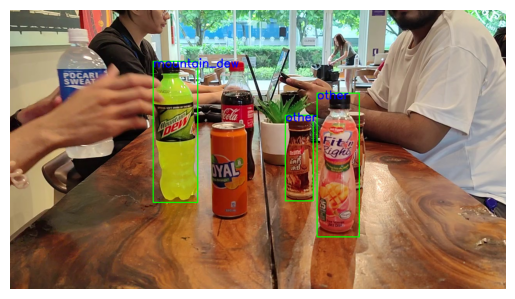

In [4]:
# test_image = '../others_test/frame_0002.jpg'
test_image = '../../performance_test/frame_0054.jpg'

image = cv.imread(test_image)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

img_size = (256,256)
model = YOLO('yolov8n.pt')
detected_obj = model.predict(image, conf=0.7, save=False, classes = [39])

# classes = ['coke', 'mountain_dew', 'others', 'pocari']
classes = ['coke', 'mountain_dew', 'other', 'pocari']

if len(detected_obj) != 0:
            for obj in detected_obj:
                for deets in obj.boxes.data.tolist():
                    xmin, ymin, xmax, ymax = int(deets[0]), int(deets[1]), int(deets[2]), int(deets[3])
                    names = model.names

                    # print(xmin, ymin, xmax, ymax)
                    roi = image[ymin:ymax, xmin:xmax]
                    roi = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
                    roi = cv.resize(roi, img_size)
                    roi = np.expand_dims(roi, axis=0)
                    print(roi.shape)
                    print(roi)

                    predictions = classify_obj(roi)
                    # print(predictions)
                    brand = np.argmax(predictions[0])
                    print(predictions)
                    print(brand, classes[brand])
                    cv.rectangle(image, (xmin, ymin) , (xmax, ymax), (0,255,0), 2)
                    cv.putText(image, str(classes[brand]), (xmin, ymin +15), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                    
            plt.imshow(image)
            plt.axis('off')
            plt.show



0: 384x640 6 bottles, 99.6ms
Speed: 2.5ms preprocess, 99.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


(1, 256, 256)
[[[ 98  96  93 ... 176 176 176]
  [114 112 109 ... 177 177 177]
  [ 95  94  92 ... 176 176 176]
  ...
  [ 43  43  44 ...  59  59  59]
  [ 45  45  45 ...  56  55  54]
  [ 45  45  45 ...  60  59  59]]]
1/1 [==============================] - 0s 350ms/step
[[    0.99997  2.2764e-05  1.6841e-06  2.6165e-06]]
0 coke
(1, 256, 256)
[[[66 65 65 ... 24 23 24]
  [62 62 62 ...  9  7  8]
  [59 58 58 ... 11 11 11]
  ...
  [29 31 32 ... 83 85 87]
  [28 30 32 ... 82 83 83]
  [28 30 33 ... 83 84 84]]]
1/1 [==============================] - 0s 126ms/step
[[ 6.2338e-11     0.23113  0.00040352     0.76846]]
3 pocari
(1, 256, 256)
[[[ 36  36  36 ... 183 184 184]
  [ 34  35  35 ... 169 170 170]
  [ 36  36  36 ... 163 163 164]
  ...
  [ 22  22  22 ...  51  51  51]
  [ 15  15  16 ...  52  52  52]
  [ 56  57  64 ...  54  54  55]]]
1/1 [==============================] - 0s 129ms/step
[[ 0.00030733  0.00040185     0.98069      0.0186]]
2 other
(1, 256, 256)
[[[120 124 138 ...  87  86  85]
  [119 12

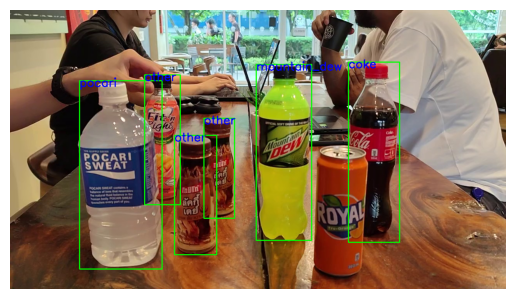

In [5]:
test_image = '../../performance_test_samples/test_images/frame_0024.jpg'

image = cv.imread(test_image)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

img_size = (256,256)
model = YOLO('yolov8n.pt')
detected_obj = model.predict(image, conf=0.7, save=False, classes = [39])

# classes = ['coke', 'mountain_dew', 'others', 'pocari']
classes = ['coke', 'mountain_dew', 'other', 'pocari']

if len(detected_obj) != 0:
            for obj in detected_obj:
                for deets in obj.boxes.data.tolist():
                    xmin, ymin, xmax, ymax = int(deets[0]), int(deets[1]), int(deets[2]), int(deets[3])
                    names = model.names

                    # print(xmin, ymin, xmax, ymax)
                    roi = image[ymin:ymax, xmin:xmax]
                    roi = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
                    roi = cv.resize(roi, img_size)
                    roi = np.expand_dims(roi, axis=0)
                    print(roi.shape)
                    print(roi)

                    predictions = classify_obj(roi)
                    # print(predictions)
                    brand = np.argmax(predictions[0])
                    print(predictions)
                    print(brand, classes[brand])
                    cv.rectangle(image, (xmin, ymin) , (xmax, ymax), (0,255,0), 2)
                    cv.putText(image, str(classes[brand]), (xmin, ymin +15), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                    
            plt.imshow(image)
            plt.axis('off')
            plt.show



0: 384x640 3 bottles, 200.9ms
Speed: 10.9ms preprocess, 200.9ms inference, 27.0ms postprocess per image at shape (1, 3, 384, 640)


(1, 256, 256)
[[[179 179 180 ... 169 169 168]
  [179 180 180 ... 169 169 168]
  [179 180 180 ... 166 166 166]
  ...
  [122 126 127 ... 136 132 132]
  [ 97 117 125 ... 135 134 133]
  [ 83  87 103 ... 129 136 141]]]
1/1 [==============================] - 0s 372ms/step
[[ 1.3112e-17           1  8.5217e-15  2.3465e-11]]
1 mountain_dew
(1, 256, 256)
[[[179 179 179 ... 181 181 181]
  [180 180 180 ... 181 181 181]
  [182 182 182 ... 181 181 181]
  ...
  [ 65  65  65 ... 144 143 143]
  [ 66  66  65 ... 145 144 143]
  [ 67  67  66 ... 145 144 144]]]
1/1 [==============================] - 0s 154ms/step
[[    0.99995  1.0326e-05  3.8139e-05  6.8711e-08]]
0 coke
(1, 256, 256)
[[[171 162 160 ... 181 181 181]
  [169 161 159 ... 181 181 181]
  [165 159 157 ... 181 181 181]
  ...
  [140 141 138 ... 137 136 134]
  [137 136 132 ... 136 136 135]
  [138 137 136 ... 134 134 134]]]
1/1 [==============================] - 0s 145ms/step
[[ 6.7074e-14  4.7943e-11  4.2517e-06           1]]
3 pocari


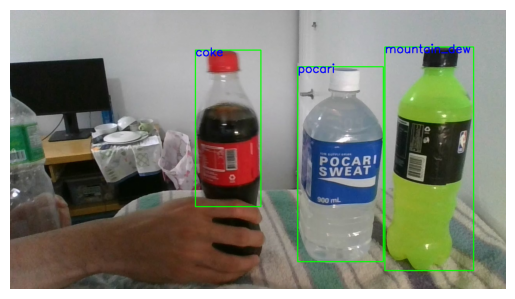

In [13]:
test_image = '../../performance_test_2/frame_0095.jpg'

image = cv.imread(test_image)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

img_size = (256,256)
model = YOLO('yolov8n.pt')
detected_obj = model.predict(image, conf=0.7, save=False, classes = [39])

# classes = ['coke', 'mountain_dew', 'others', 'pocari']
classes = ['coke', 'mountain_dew', 'other', 'pocari']

if len(detected_obj) != 0:
            for obj in detected_obj:
                for deets in obj.boxes.data.tolist():
                    xmin, ymin, xmax, ymax = int(deets[0]), int(deets[1]), int(deets[2]), int(deets[3])
                    names = model.names

                    # print(xmin, ymin, xmax, ymax)
                    roi = image[ymin:ymax, xmin:xmax]
                    roi = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
                    roi = cv.resize(roi, img_size)
                    roi = np.expand_dims(roi, axis=0)
                    print(roi.shape)
                    print(roi)

                    predictions = classify_obj(roi)
                    # print(predictions)
                    brand = np.argmax(predictions[0])
                    print(predictions)
                    print(brand, classes[brand])
                    cv.rectangle(image, (xmin, ymin) , (xmax, ymax), (0,255,0), 2)
                    cv.putText(image, str(classes[brand]), (xmin, ymin +15), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                    
            plt.imshow(image)
            plt.axis('off')
            plt.show


In [7]:
test_image = '../../performance_test_samples/test_images/frame_0091.jpg'

image = cv.imread(test_image)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

img_size = (256,256)
model = YOLO('yolov8n.pt')
detected_obj = model.predict(image, conf=0.7, save=False, classes = [39])

# classes = ['coke', 'mountain_dew', 'others', 'pocari']
classes = ['coke', 'mountain_dew', 'other', 'pocari']

if len(detected_obj) != 0:
            for obj in detected_obj:
                for deets in obj.boxes.data.tolist():
                    xmin, ymin, xmax, ymax = int(deets[0]), int(deets[1]), int(deets[2]), int(deets[3])
                    names = model.names

                    # print(xmin, ymin, xmax, ymax)
                    roi = image[ymin:ymax, xmin:xmax]
                    roi = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
                    roi = cv.resize(roi, img_size)
                    roi = np.expand_dims(roi, axis=0)
                    print(roi.shape)
                    print(roi)

                    predictions = classify_obj(roi)
                    # print(predictions)
                    brand = np.argmax(predictions[0])
                    print(predictions)
                    print(brand, classes[brand])
                    cv.rectangle(image, (xmin, ymin) , (xmax, ymax), (0,255,0), 2)
                    cv.putText(image, str(classes[brand]), (xmin, ymin +15), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                    
            plt.imshow(image)
            plt.axis('off')
            plt.show


[ WARN:0@22.873] global loadsave.cpp:248 findDecoder imread_('../../performance_test_samples/test_images/frame_0091.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



0: 384x640 6 bottles, 149.9ms
Speed: 3.4ms preprocess, 149.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


(1, 256, 256)
[[[204 219 240 ... 160 168 173]
  [200 217 240 ... 130 127 126]
  [191 209 235 ... 123 123 123]
  ...
  [ 76  74  71 ...  77  77  77]
  [ 71  71  71 ...  70  70  70]
  [ 76  76  75 ...  71  71  72]]]
1/1 [==============================] - 0s 189ms/step
[[ 2.4572e-11  0.00051137  0.00030544     0.99918]]
3 pocari
(1, 256, 256)
[[[ 8  8  8 ... 95 97 98]
  [ 8  8  8 ... 93 92 92]
  [ 8  8  8 ... 96 94 94]
  ...
  [62 62 59 ... 85 86 86]
  [67 66 63 ... 83 83 83]
  [70 70 69 ... 78 79 79]]]
1/1 [==============================] - 0s 152ms/step
[[    0.62896    0.015014     0.30947    0.046555]]
0 coke
(1, 256, 256)
[[[160 160 160 ...  73  73  73]
  [160 160 160 ...  75  75  75]
  [160 160 160 ...  77  77  77]
  ...
  [ 73  73  72 ...  64  61  61]
  [ 86  86  84 ...  65  63  63]
  [ 84  84  81 ...  66  66  66]]]
1/1 [==============================] - 0s 162ms/step
[[ 8.1712e-07  1.4284e-09           1  7.3904e-07]]
2 other
(1, 256, 256)
[[[ 54  54  54 ... 186 186 186]
  [ 51  5

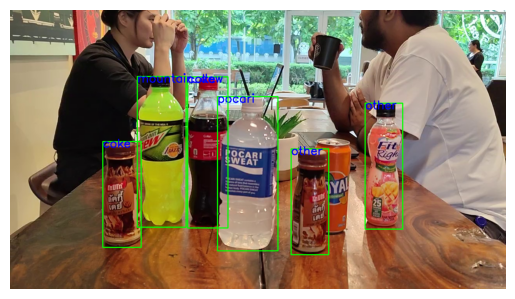

In [ ]:
test_image = '../../performance_test_samples/test_images/frame_0002.jpg'
image = cv.imread(test_image)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

img_size = (256,256)
model = YOLO('yolov8n.pt')
detected_obj = model.predict(image, conf=0.7, save=False, classes = [39])

# classes = ['coke', 'mountain_dew', 'others', 'pocari']
classes = ['coke', 'mountain_dew', 'other', 'pocari']

if len(detected_obj) != 0:
            for obj in detected_obj:
                for deets in obj.boxes.data.tolist():
                    xmin, ymin, xmax, ymax = int(deets[0]), int(deets[1]), int(deets[2]), int(deets[3])
                    names = model.names

                    # print(xmin, ymin, xmax, ymax)
                    roi = image[ymin:ymax, xmin:xmax]
                    roi = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
                    roi = cv.resize(roi, img_size)
                    roi = np.expand_dims(roi, axis=0)
                    print(roi.shape)
                    print(roi)

                    predictions = classify_obj(roi)
                    # print(predictions)
                    brand = np.argmax(predictions[0])
                    print(predictions)
                    print(brand, classes[brand])
                    cv.rectangle(image, (xmin, ymin) , (xmax, ymax), (0,255,0), 2)
                    cv.putText(image, str(classes[brand]), (xmin, ymin +15), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                    
            plt.imshow(image)
            plt.axis('off')
            plt.show
